In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd /content/drive/MyDrive/Colab Notebooks/zip_files/

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ML_data

/content/drive/MyDrive/Colab Notebooks/ML_data


In [ ]:
!ls

In [ ]:
!unzip '*.zip' -d /content/drive/MyDrive/"Colab Notebooks"/ML_data

In [ ]:
while True:
    pass

KeyboardInterrupt: ignored

In [ ]:
!sudo unzip /content/drive/MyDrive/"Colab Notebooks"/img.zip -d /content/drive/MyDrive/"Colab Notebooks"/img_final

In [ ]:
while True:
    pass

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/img_final/img
import glob
file = glob.glob('/content/drive/MyDrive/Colab Notebooks/img_final/img/*')

In [ ]:
len(file)

1580

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import glob

In [ ]:
def fileList(path_before : str)->list : 
    file_list = os.listdir(path_before) 
    category=[]
    for file in file_list: 
        temp_list = file.split("_")  
        category.append(temp_list[0]) 
    print(len(category))
    temp_set = set(category) 
    result = list(temp_set)
    return result 

# C:\Users\LG그램\Desktop\img1

In [ ]:
filelist = fileList('/content/drive/MyDrive/Colab Notebooks/ML_data/')

67596


In [ ]:
len(filelist)

22

In [ ]:
import glob
len(glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_data/*'))

67597

In [ ]:
filelist.remove('.7z')

In [ ]:
filelist = ['Jersey',
 'Trunks',
 'Button-Down',
 'Coat',
 'Cutoffs',
 'Sweatshorts',
 'Jeggings',
 'Tee',
 'Cardigan',
 'Parka',
 'Sweatpants',
 'Kimono',
 'Top',
 'Sweater',
 'Turtleneck',
 'Joggers',
 'Jeans',
 'Chinos',
 'Flannel',
 'Poncho',
 'Blazer',
 'Tank',
 'Romper',
 'Jacket',
 'Blouse',
 'Shorts',
 'Leggings',
 'Culottes',
 'Hoodie',
 'Jumpsuit',
 'Skirt',
 'Henley']

In [ ]:
filelist

['Cardigan',
 'Jacket',
 'Anorak',
 'Culottes',
 'Cutoffs',
 'Halter',
 'Trunks',
 'Blouse',
 'Button-Down',
 'Bomber',
 'Coverup',
 'Capris',
 'Caftan',
 'Top',
 'Flannel',
 'Hoodie',
 'Chinos',
 'Gauchos',
 'Turtleneck',
 'Coat',
 'Blazer',
 'Henley']

In [ ]:
def makeFolder(path_after : str, file_list : list):  
    for file in file_list: 
        try: 
            os.makedirs(path_after+"/"+file) 
        except: 
            pass

In [ ]:
makeFolder('/content/drive/MyDrive/Colab Notebooks/ML_data', filelist)

In [ ]:
count=0
for file in filelist:
    ar = glob.glob('/content/drive/MyDrive/Colab Notebooks/img_final/img/*_' + file + '/*')
    for num, a in enumerate(ar):s
        file_modified = os.path.join('/content/drive/MyDrive/Colab Notebooks/ML_data/'+file, file + '_' + str(num)+'.jpg')
        shutil.copy(a, file_modified)
    count+=1
    print(count)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
import glob
# /content/drive/MyDrive/Colab Notebooks/ML_data
len(glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_data/*'))

217071

In [ ]:
len(filelist)

32

In [ ]:
file_dict = {string : i for i, string in enumerate(filelist)}

In [ ]:
file_dict = {'Kaftan': 0,
 'Capris': 1,
 'Leggings': 2,
 'Tee': 3,
 'Flannel': 4,
 'Sweatpants': 5,
 'Sweatshorts': 6,
 'Jumpsuit': 7,
 'Kimono': 8,
 'Peacoat': 9,
 'Blazer': 10,
 'Jersey': 11,
 'Button-Down': 12,
 'Jodhpurs': 13,
 'Robe': 14,
 'Chinos': 15,
 'Onesie': 16,
 'Gauchos': 17,
 'Shorts': 18,
 'Parka': 19,
 'Hoodie': 20,
 'Joggers': 21,
 'Caftan': 22,
 'Top': 23,
 'Jeans': 24,
 'Halter': 25,

 'Sweater': 26,
 'Romper': 27,
 'Henley': 28,
 'Jeggings': 29,
 'Culottes': 30,
 'Tank': 31,
 'Blouse': 32,
 'Coat': 33,
 'Coverup': 34,
 'Trunks': 35,
 'Cardigan': 36,
 'Jacket': 37,
 'Bomber': 38,
 'Poncho': 39,
 'Anorak': 40,
 'Turtleneck': 41,
 'Cutoffs': 42,
 'Sarong': 43,
 'Skirt': 44}

In [ ]:
p = transforms.Compose([
    transforms.Resize([227,227]),
#     transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
len(glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_data/*'))

67596

In [ ]:
class ClothDataset(Dataset):
    def __init__(self,file_dict, transform=None):
#         self.all_data = sorted(glob.glob(os.path.join(data_dir, mode, '*', '*')))
        self.file_dict = file_dict
        self.all_data = glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_data/*')
        self.transform = transform
    
    def __getitem__(self, index):

        data_path = self.all_data[index]    
        img = pil_loader(data_path)         
        if self.transform is not None:
            img = self.transform(img)
        
        label_name = os.path.basename(data_path).split('_')[0]
        label = self.file_dict[label_name]
        
        return img, label
    
    def __len__(self):
        # length = 289219
        length = len(self.all_data)
        return length

In [ ]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

In [ ]:
train_data = ClothDataset(file_dict, transform=p)

In [ ]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, drop_last=True)

In [ ]:
import torchvision.models as models

model = models.alexnet(pretrained=True)

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model.classifier[6] = nn.Linear(in_features=4096, out_features=45, bias=True)
# model.classifier = nn.Sequential(*list(model.classifier) + [nn.Linear(in_features=1000, out_features=46, bias=True)])


In [ ]:
for param in model.parameters():
#     print(param)
    param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
#     print(name)
    if name in ['classifier.6.weight', 'classifier.6.bias']:
        param.requires_grad = True

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad == True:
        print(name)

classifier.6.weight
classifier.6.bias


In [ ]:
import torch.optim as optim
import torch.nn as nn

#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
loss_list = []
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)
#         loss = F.cross_entropy(output, labels)
        loss.backward()
        optimizer.step()
        print(loss.item())
#         break
        # print statistics
#         running_loss += loss.item()
#         loss_list.append(running_loss)
#         print(loss.item())
#         if i % 2 == 0:
#         # print every 2000 mini-batches
#             print(loss.item())
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2))
#             running_loss = 0.0
    print(f'------------ {epoch} finished!!! ------------')
print('Finished Training of AlexNet')

3.2359580993652344
3.3376243114471436
3.267920970916748
3.278489589691162
3.2528231143951416
3.263564109802246
3.2709145545959473
3.2629504203796387
3.2843122482299805
3.2236995697021484
3.278369665145874
3.2517802715301514
3.282128095626831
3.24078631401062
3.244344711303711
3.2323431968688965
3.280003070831299
3.300143241882324
3.254660129547119
3.272507667541504
3.2583322525024414
3.1898674964904785
3.260831594467163
3.2384965419769287
3.2636923789978027
3.2841036319732666
3.268265724182129
3.2411975860595703
3.2969861030578613
3.2951276302337646
3.2827296257019043
3.2254345417022705
3.221998929977417
3.2760426998138428
3.2875969409942627
3.282121181488037
3.24212384223938
3.2991654872894287
3.3015544414520264
3.299743413925171
3.278094530105591
3.2403531074523926
3.251309394836426
3.29449200630188
3.284925937652588
3.284383535385132
3.2260475158691406
3.274590492248535
3.2910358905792236
3.3148856163024902
3.2470996379852295
3.2421014308929443
3.2431418895721436
3.3099234104156494


KeyboardInterrupt: ignored

In [ ]:
a = '''
3.2359580993652344
3.3376243114471436
3.267920970916748
3.278489589691162
3.2528231143951416
3.263564109802246
3.2709145545959473
3.2629504203796387
3.2843122482299805
3.2236995697021484
3.278369665145874
3.2517802715301514
3.282128095626831
3.24078631401062
3.244344711303711
3.2323431968688965
3.280003070831299
3.300143241882324
3.254660129547119
3.272507667541504
3.2583322525024414
3.1898674964904785
3.260831594467163
3.2384965419769287
3.2636923789978027
3.2841036319732666
3.268265724182129
3.2411975860595703
3.2969861030578613
3.2951276302337646
3.2827296257019043
3.2254345417022705
3.221998929977417
3.2760426998138428
3.2875969409942627
3.282121181488037
3.24212384223938
3.2991654872894287
3.3015544414520264
3.299743413925171
3.278094530105591
3.2403531074523926
3.251309394836426
3.29449200630188
3.284925937652588
3.284383535385132
3.2260475158691406
3.274590492248535
3.2910358905792236
3.3148856163024902
3.2470996379852295
3.2421014308929443
3.2431418895721436
3.3099234104156494
3.2277698516845703
3.2687129974365234
3.2900593280792236
3.2688026428222656
3.2941250801086426
3.2439346313476562
3.244994878768921
3.294705390930176
3.2820851802825928
3.309250593185425
3.2266945838928223
3.2234280109405518
3.2049381732940674
'''

In [ ]:
a = a.split('\n')[1:-1]

In [ ]:
a = [float(i) for i in a]

In [ ]:
a

[3.2359580993652344,
 3.3376243114471436,
 3.267920970916748,
 3.278489589691162,
 3.2528231143951416,
 3.263564109802246,
 3.2709145545959473,
 3.2629504203796387,
 3.2843122482299805,
 3.2236995697021484,
 3.278369665145874,
 3.2517802715301514,
 3.282128095626831,
 3.24078631401062,
 3.244344711303711,
 3.2323431968688965,
 3.280003070831299,
 3.300143241882324,
 3.254660129547119,
 3.272507667541504,
 3.2583322525024414,
 3.1898674964904785,
 3.260831594467163,
 3.2384965419769287,
 3.2636923789978027,
 3.2841036319732666,
 3.268265724182129,
 3.2411975860595703,
 3.2969861030578613,
 3.2951276302337646,
 3.2827296257019043,
 3.2254345417022705,
 3.221998929977417,
 3.2760426998138428,
 3.2875969409942627,
 3.282121181488037,
 3.24212384223938,
 3.2991654872894287,
 3.3015544414520264,
 3.299743413925171,
 3.278094530105591,
 3.2403531074523926,
 3.251309394836426,
 3.29449200630188,
 3.284925937652588,
 3.284383535385132,
 3.2260475158691406,
 3.274590492248535,
 3.291035890579223

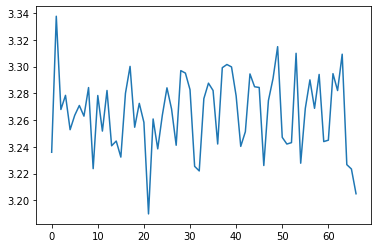

In [ ]:
plt.plot(a)

model = torch.hub.load('googlenet', pretrained=True).to(device)

In [ ]:
import torchvision.models as models

# model = models.alexnet(pretrained=True)

In [ ]:
model = models.googlenet(pretrained=True) 

In [ ]:
model.fc = nn.Linear(in_features=1024, out_features=22, bias=True)

In [ ]:
for param in model.parameters():
#     print(param)
    param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
#     print(name)
    if name in ['fc.weight','fc.bias']:
        param.requires_grad = True

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad == True:
        print(name)

fc.weight
fc.bias


In [ ]:
model.to(device)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track